In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/BankChurnModelling.csv')

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.replace({'Geography': {'France': 2,'Germany' : 1, 'Spain': 0}},inplace=True )

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.replace({'Gender': {'Male': 0, 'Female':1}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [ ]:
df.replace({'Num Of Products': {1: 0,2:1,3:1,4:1}},inplace=True)

#a customer has how many number of products

In [ ]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df['Zero Balance'] =np.where(df['Balance']>0,1,0)

<Axes: >

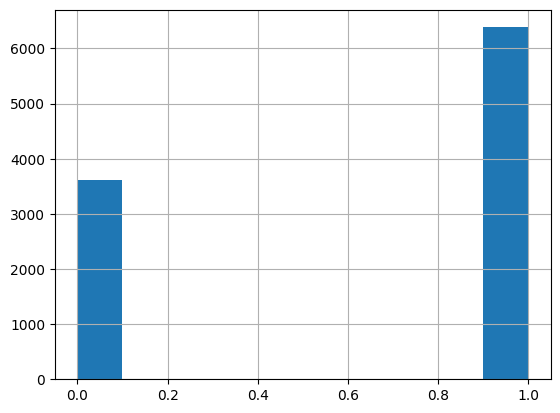

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X = df.drop(['Surname', 'Churn'],axis =1)
y = df['Churn']

In [ ]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

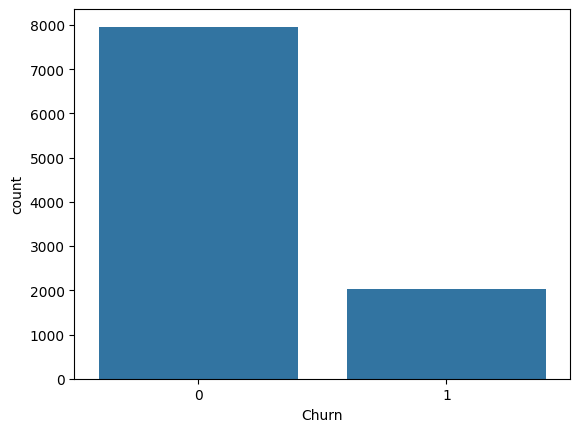

In [ ]:
sns.countplot(x = 'Churn', data =df);

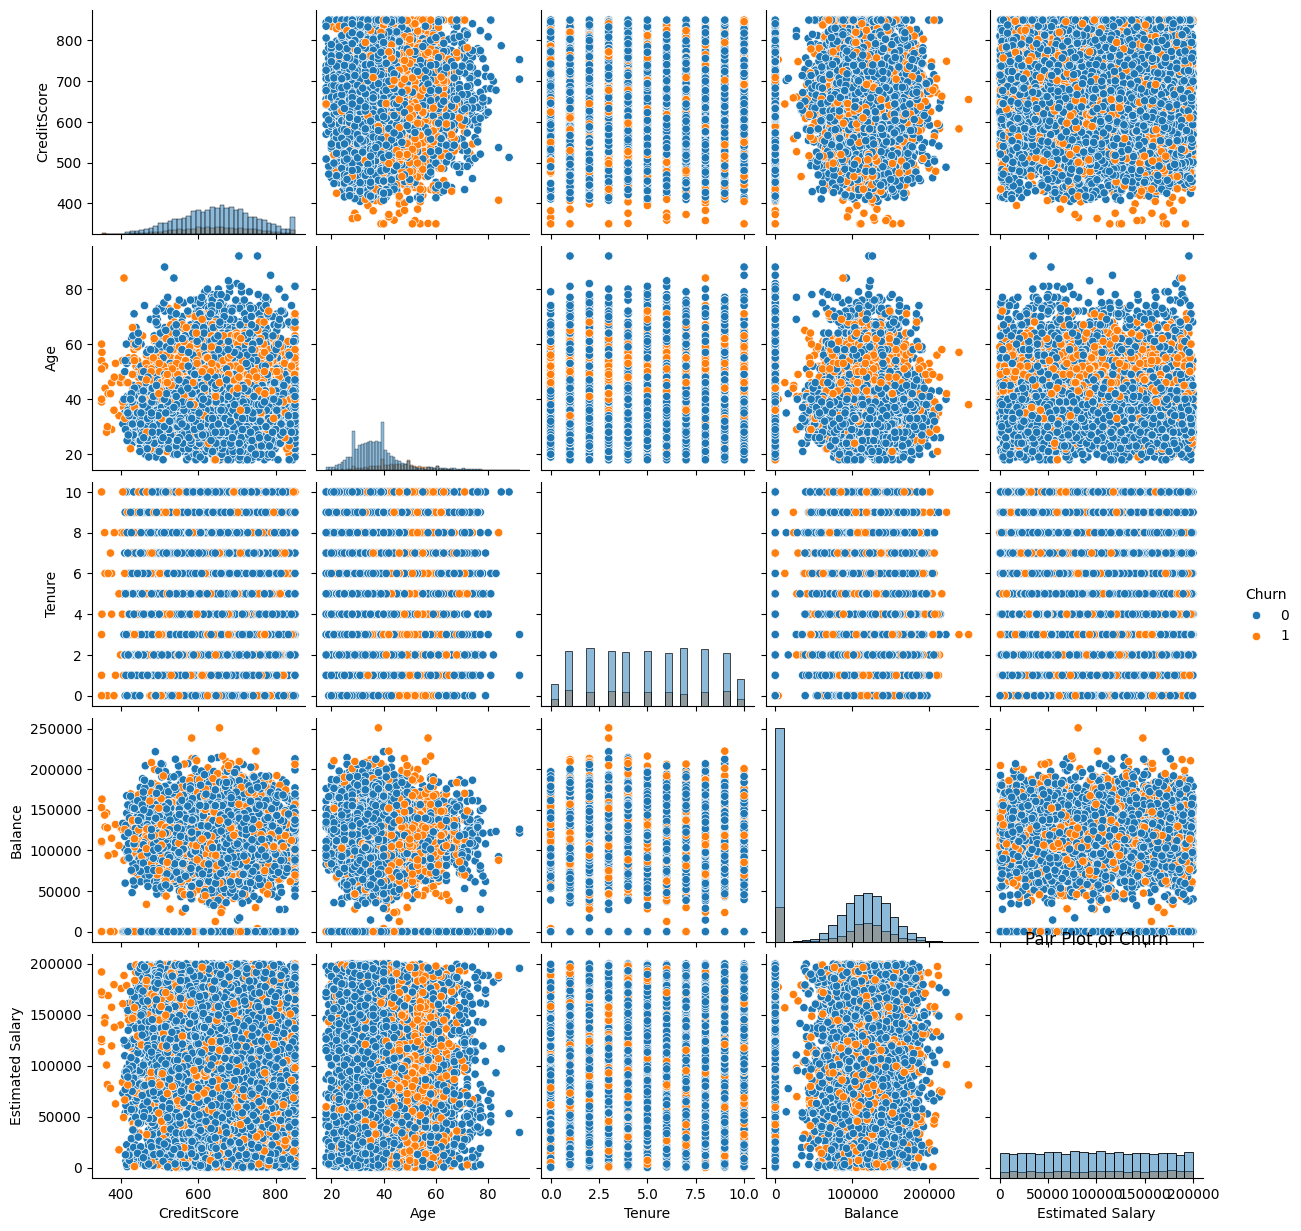

In [ ]:
sns.pairplot(df, hue='Churn', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary'], diag_kind='hist')
plt.title('Pair Plot of Churn')
plt.show()

In [ ]:
rus =RandomUnderSampler(random_state=12529)

In [ ]:
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

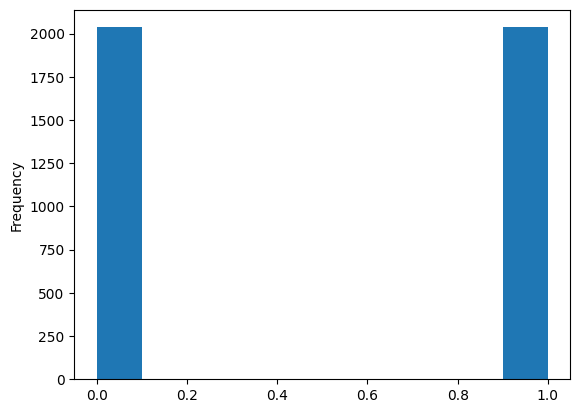

In [ ]:
y_rus.plot(kind ='hist')

In [ ]:
ros = RandomUnderSampler(random_state=12529)

In [ ]:
X_ros, y_ros = ros.fit_resample(X,y)

<Axes: ylabel='Frequency'>

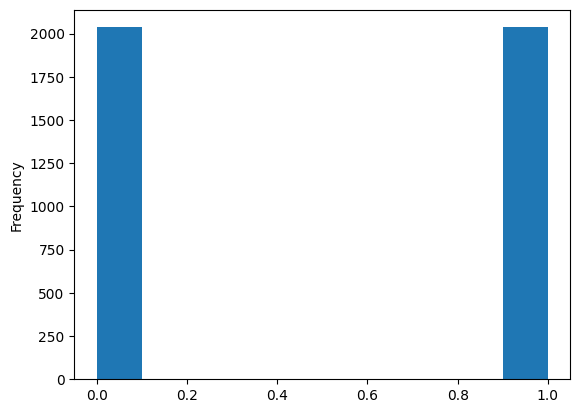

In [ ]:
y_ros.plot(kind ='hist')

In [ ]:
#original

X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state =12529)

In [ ]:
#under

X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.3)

In [ ]:
#over

X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros, test_size=0.3)

In [ ]:
sc= StandardScaler()

In [ ]:
X_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_train_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
svc =SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [ ]:
accuracy_score(y_train,y_pred_train)

0.8358571428571429

In [ ]:
accuracy_score(y_test,y_pred_test)

0.8193333333333334

In [ ]:
cm1= confusion_matrix(y_test, y_pred_test)
cm1

array([[2326,   26],
       [ 516,  132]])

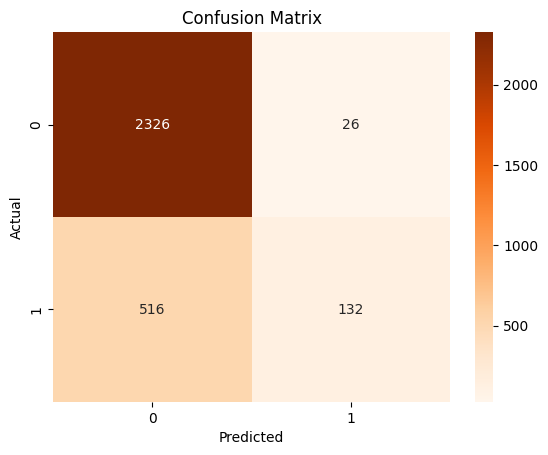

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2352
           1       0.84      0.20      0.33       648

    accuracy                           0.82      3000
   macro avg       0.83      0.60      0.61      3000
weighted avg       0.82      0.82      0.77      3000



In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
cm2= confusion_matrix(y_test,grid_predictions)

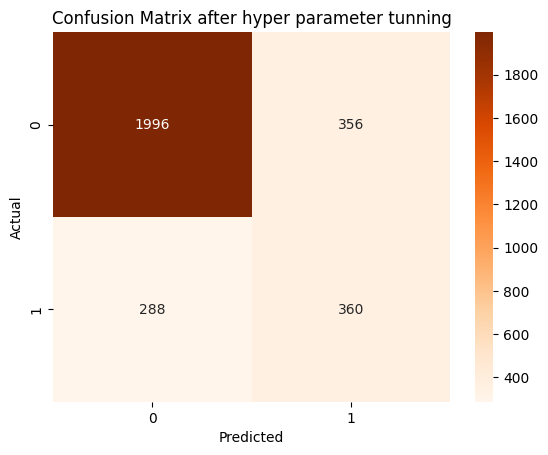

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after hyper parameter tunning')
plt.show()

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2352
           1       0.50      0.56      0.53       648

    accuracy                           0.79      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
svc_rus =SVC()

In [ ]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [ ]:
y_pred_rus= svc_rus.predict(X_test_rus)

In [ ]:
y_pred_rus_train = svc_rus.predict(X_train_rus)

In [ ]:
accuracy_score(y_train_rus,y_pred_rus_train)

0.748509294984216

In [ ]:
accuracy_score(y_test_rus,y_pred_rus)

0.6999182338511856

In [ ]:
cm3= confusion_matrix(y_test_rus, y_pred_rus)
cm3

array([[455, 129],
       [238, 401]])

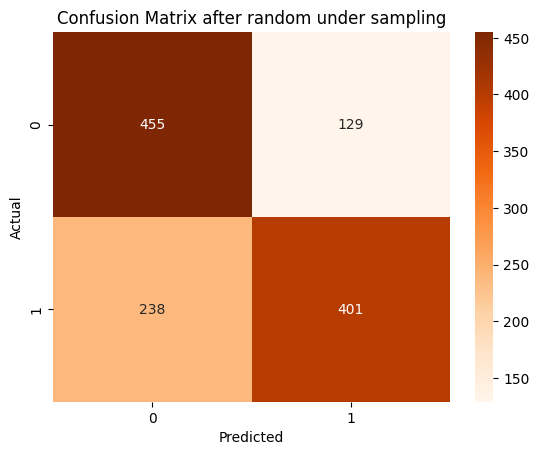

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random under sampling')
plt.show()

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       584
           1       0.76      0.63      0.69       639

    accuracy                           0.70      1223
   macro avg       0.71      0.70      0.70      1223
weighted avg       0.71      0.70      0.70      1223



In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test_rus)
grid_predictions_rus

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
cm4= confusion_matrix(y_test_rus,grid_predictions_rus)
cm4

array([[448, 136],
       [226, 413]])

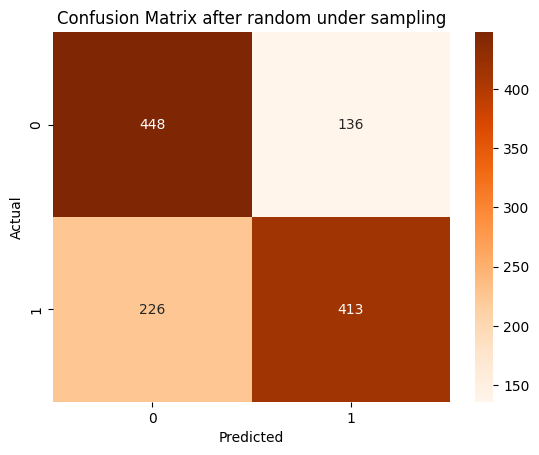

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm4, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random under sampling')
plt.show()

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       584
           1       0.75      0.65      0.70       639

    accuracy                           0.70      1223
   macro avg       0.71      0.71      0.70      1223
weighted avg       0.71      0.70      0.70      1223



In [ ]:
svc_ros = SVC()

In [ ]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [ ]:
y_pred_ros = svc_ros.predict(X_test_ros)

In [ ]:
y_pred_ros_train = svc_ros.predict(X_train_ros)

In [ ]:
accuracy_score(y_train_ros,y_pred_ros_train)

0.7555243774114346

In [ ]:
accuracy_score(y_test_ros,y_pred_ros)

0.6950122649223222

In [ ]:
cm5= confusion_matrix(y_test_ros,y_pred_ros)
cm5

array([[440, 179],
       [194, 410]])

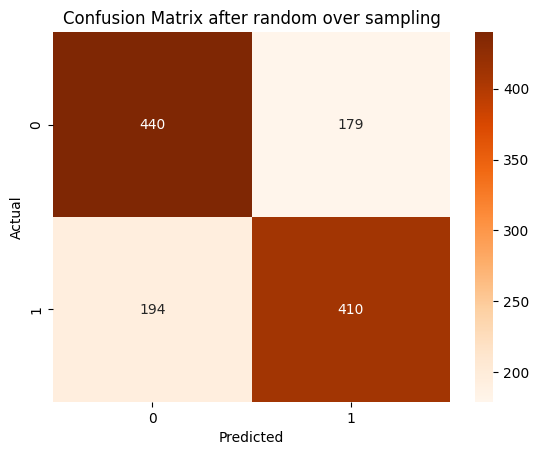

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random over sampling')
plt.show()

In [ ]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       619
           1       0.70      0.68      0.69       604

    accuracy                           0.70      1223
   macro avg       0.70      0.69      0.69      1223
weighted avg       0.70      0.70      0.69      1223



In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid_ros = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [ ]:
cm6= confusion_matrix(y_test_ros,grid_predictions_ros)
cm6

array([[444, 175],
       [189, 415]])

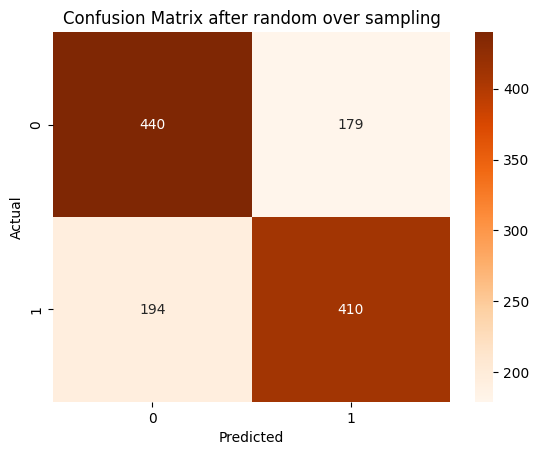

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random over sampling')
plt.show()

In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       619
           1       0.70      0.69      0.70       604

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



Compare

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2352
           1       0.84      0.20      0.33       648

    accuracy                           0.82      3000
   macro avg       0.83      0.60      0.61      3000
weighted avg       0.82      0.82      0.77      3000



In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2352
           1       0.50      0.56      0.53       648

    accuracy                           0.79      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       584
           1       0.75      0.65      0.70       639

    accuracy                           0.70      1223
   macro avg       0.71      0.71      0.70      1223
weighted avg       0.71      0.70      0.70      1223



In [ ]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       619
           1       0.70      0.68      0.69       604

    accuracy                           0.70      1223
   macro avg       0.70      0.69      0.69      1223
weighted avg       0.70      0.70      0.69      1223



In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       619
           1       0.70      0.69      0.70       604

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223

